# Clustering Quality of  WALS Subareas

## phonology subareas:
    - Consonants: 10 features
    - Vowels: 4 features
    - Prosody: 5 features (including 13A -- Tone)
 * 12A -- syllable structure is not assigned any subarea
 * 3A -- consonant / vowel ratio is listed as both vowel-related and consonant-related 
 * 10B -- Nasal vowels in west Africa is out of the statistics alltogether



### The following three tables show the best silhoutte score of all feature groups restricted to the these subfields with at least 30 languages. 

In [3]:
import pandas as pd
import pickle
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
consonants = pd.read_csv('../miscsv/consonants-silhouettes.csv')
vowels = pd.read_csv('../miscsv/vowels-silhouettes.csv')
prosody = pd.read_csv('../miscsv/prosody-silhouettes.csv')

In [4]:
consonants.describe()

,silhouette score
count,883.000000
mean,0.199526
std,0.066717
min,0.006535
25%,0.165422
50%,0.197799
75%,0.239928
max,0.375377


In [5]:
vowels

,silhouette score
0,0.415485
1,0.267270
2,0.150418
3,0.269262


In [6]:
prosody.describe()

,silhouette score
count,37.000000
mean,0.142081
std,0.052859
min,0.028417
25%,0.112963
50%,0.134855
75%,0.188024
max,0.230584


As you can see, there were only 4 groups in the vowels set, so it can't really be compared with the consonant groups, which are only slightly better than the 'prosody' groups (thre were 37 of those).

## Mixed Feature Sets

The following statistics were computed on 1500 phonological feature sets including at least 4 features, from exactlyt two subgroups -- either consonants, vowels or consonants,prosody --  with a maximal proportion of 0.7 for the dominant subarea.

In [8]:
groups = pickle.load(open('feature-sets/phon-2subs-1832-index5-with-gensep.pkl','rb'))
groups = groups[:1500]

In [9]:
gstats = list()
for g in groups:
    top2fams = g.families.most_common(2)
    gstats.append({
        'spectral index' : g.quality_index,
        'genetic silhouette' : g.genetic_silhouette_score,
        'silhouette dims' : sorted(g.genetic_silhouettes,key=lambda x: x[1],reverse=True)[0][0],
        'family 1' : top2fams[0][1],
        'family 2' : top2fams[1][1]
    })
gstats = pd.DataFrame(gstats)

In [10]:
gstats.describe()

,family 1,family 2,genetic silhouette,silhouette dims,spectral index
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,32.434000,26.212667,0.280332,1.320000,6.320377
std,15.325085,11.975435,0.106397,0.879839,1.166929
min,15.000000,12.000000,0.144273,0.000000,5.000447
25%,15.000000,14.000000,0.192800,1.000000,5.457913
50%,25.000000,21.000000,0.263774,1.000000,5.972155
75%,50.000000,39.000000,0.345658,2.000000,6.829360
max,54.000000,45.000000,0.706213,12.000000,10.650957


* family 1 : number of languages from the most common family among the languages covered by the feature set

* family 2 : number of languages from the second most common family

* genetic silhouette : silhouette computed on two clusters (family1,family2) -- optimized over the number of PCs representing the points (languages). O means no silhuette computed by Manhattan distance between raw points. By "raw" I mean not projected on any eigen vector basis.  -1 (never occuring in this collection) means the same, with euclidean distance.

* silhuette dims: the number of dimensions yielding the highest silhouette. In most cases, representing languages only by their 1st PC coordinate yields the best results. But a non-negligable number of cases works better with raw points or with 2 or 3 PCs. Hence my question regarding the computation of feature significance. Following is some statistics about this point.

In [12]:
# Number of feature sets for which the best silhouette is provided by some representation other than
# purely 1st PC
len(gstats.loc[gstats['silhouette dims'] != 1])

555

In [14]:
# Number of feature sets for which the best silhouette is provided by some representation other than
# raw or 1st PC alone
len(gstats.loc[gstats['silhouette dims'] > 1])

443

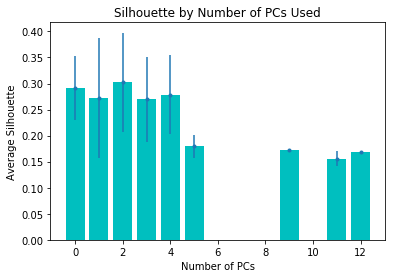

In [16]:
dfs = list()
x = np.arange(-1,13)
for i in x:
    dfs.append(gstats.loc[gstats['silhouette dims'] == i])

from matplotlib import cm
means = np.array([df['genetic silhouette'].mean() for df in dfs])
stds = np.array([df['genetic silhouette'].std() for df in dfs])
counts = np.array([len(df) for df in dfs])

plt.title("Silhouette by Number of PCs Used")
plt.ylabel('Average Silhouette')
plt.xlabel('Number of PCs')
plt.bar(x, means,color='c')
plt.errorbar(x, means, yerr=stds, fmt='.')
plt.show()

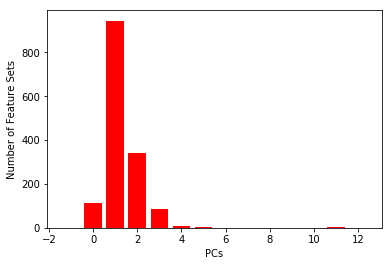

In [17]:
plt.bar(x,counts,color='r')
plt.xticks = 1
plt.ylabel('Number of Feature Sets')
plt.xlabel('PCs')
plt.show()

So, in considering feature significance, we might have to take into account the 2nd and 3rd PC as well. 

I am not sure what to make of the case where the raw data is better than the MCA/PCA transformation of it.

### Feature Contributions for 1st and 2nd PCs in the 1500 feature sets described above.

In [20]:
agg = pickle.load(open('phonology-summary-stats.pkl','rb'))
comp1 = agg['component 1']
comp2 = agg['component 2']

### 1st PC

In [21]:
comp1.sort_values(by='mean_loading',ascending=False)

,mean_loading,std,participation,subarea
5A,0.397711,0.161549,823,consonants
14A,0.323989,0.119807,422,prosody
15A,0.313426,0.101406,386,prosody
9A,0.253778,0.160439,401,consonants
4A,0.25339,0.109048,712,consonants
16A,0.246005,0.109644,334,prosody
2A,0.216192,0.199304,779,vowels
12A,0.152401,0.193628,786,None
13A,0.15179,0.17796,110,prosody
8A,0.0886649,0.0805542,621,consonants


### Mean Loading by Subarea

In [22]:
comp1cons = comp1.loc[comp1['subarea'].isin(['consonants','consonants and vowels'])]
comp1vowels = comp1.loc[comp1['subarea'].isin(['vowels','consonants and vowels'])]
comp1pros = comp1.loc[comp1['subarea'] == 'prosody']

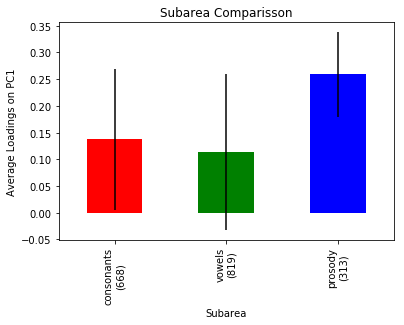

In [24]:
means = [df['mean_loading'].mean() for df in (comp1cons,comp1vowels,comp1pros)]
stds = [df['mean_loading'].std() for df in (comp1cons,comp1vowels,comp1pros)]

xlabs = [
    "consonants\n(" + str(int(comp1cons['participation'].mean())) + ")",
    "vowels\n("+str(int(comp1vowels['participation'].mean()))+")",
    "prosody\n(" + str(int(comp1pros['participation'].mean()))+")"
]

s = pd.Series(
    means,
    index = xlabs
)

plt.title("Subarea Comparisson")
plt.ylabel('Average Loadings on PC1')
plt.xlabel('Subarea')

s.plot(
    kind='bar', 
    color='rgb',
    yerr = stds
)

plt.show()

The parenthesized numbers are the average number of feature sets participated by features from this subarea in the 1500 sets. The vowels average is high, since there are only 4 vowel features. The consonant average is pretty high, because all the 1500 sets included the consonant-related subarea as one of their two subareas.

It seems then, that for the 1st PC it is prosody  that contributes the most while consonants and vowels contributions are highly varied and not significantly different.

## 2nd PC

In [25]:
comp2.sort_values(by='mean_loading',ascending=False)

,mean_loading,std,participation,subarea
12A,0.408789,0.220747,786,None
2A,0.262768,0.239671,779,vowels
9A,0.213745,0.169338,401,consonants
4A,0.212447,0.16631,712,consonants
13A,0.211549,0.117288,110,prosody
5A,0.189032,0.215342,823,consonants
8A,0.154624,0.168738,621,consonants
16A,0.149319,0.123356,334,prosody
1A,0.138509,0.114684,595,consonants
14A,0.123877,0.119582,422,prosody


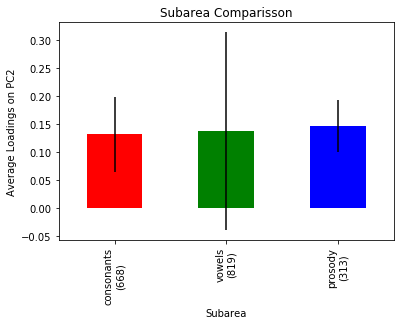

In [27]:
comp2cons = comp2.loc[comp2['subarea'].isin(['consonants','consonants and vowels'])]
comp2vowels = comp2.loc[comp2['subarea'].isin(['vowels','consonants and vowels'])]
comp2pros = comp2.loc[comp2['subarea'] == 'prosody']
means = [df['mean_loading'].mean() for df in (comp2cons,comp2vowels,comp2pros)]
stds = [df['mean_loading'].std() for df in (comp2cons,comp2vowels,comp2pros)]

xlabs = [
    "consonants\n(" + str(int(comp2cons['participation'].mean())) + ")",
    "vowels\n("+str(int(comp2vowels['participation'].mean()))+")",
    "prosody\n(" + str(int(comp2pros['participation'].mean()))+")"
]

s = pd.Series(
    means,
    index = xlabs
)

plt.title("Subarea Comparisson")
plt.ylabel('Average Loadings on PC2')
plt.xlabel('Subarea')

s.plot(
    kind='bar', 
    color='rgb',
    yerr = stds
)

plt.show()

### For example, the feature set with the best silhouette:

In [28]:
g = groups[0]
print(g)

5 long group covering 217 languages
quality index: 5.16
dim1: 25%
dim2: 18%
fields: 'phonology': 5
features:
12A Syllable Structure
13A Tone
18A Absence of Common Consonants
7A Glottalized Consonants
9A The Velar Nasal
family1: 15 (Austronesian), 
family2: 12 (Indo-European), 
separation: 0.71


In [21]:
w = g.weights()
for c in g.cols:
    print(c)
    print(w[c])
    print("\n")

12A
comp.0    0.415143
comp.1    0.205070
comp.2    0.420243
comp.3    0.103761
comp.4    0.166857
dtype: float64


13A
comp.0    0.045654
comp.1    0.419444
comp.2    0.417775
comp.3    0.001169
comp.4    0.076713
dtype: float64


18A
comp.0    0.021715
comp.1    0.005645
comp.2    0.003534
comp.3    0.004119
comp.4    0.179715
dtype: float64


7A
comp.0    0.089418
comp.1    0.077168
comp.2    0.034822
comp.3    0.668964
comp.4    0.007806
dtype: float64


9A
comp.0    0.428071
comp.1    0.292673
comp.2    0.123626
comp.3    0.221987
comp.4    0.568909
dtype: float64


